<img href='db.png'>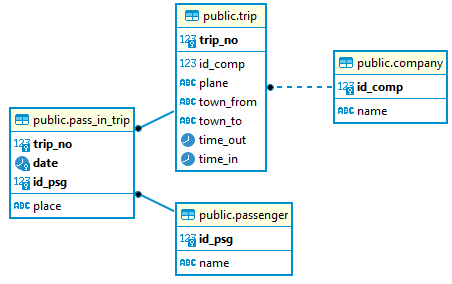

In [35]:
import psycopg2
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

In [25]:
params = {'host': 'localhost', 
          'port': 5432, 
          'dbname': 'postgres', 
          'user': 'postgres', 
          'password': '123123'
         }

In [136]:
conn = psycopg2.connect(host=params['host'], 
                        port=params['port'], 
                        dbname=params['dbname'], 
                        user=params['user'], 
                        password=params['password'])

1. Выгрузить данные из таблицы PostgreSQL в pandas DataFrame.

In [4]:
query = 'SELECT * FROM public.trip'

In [5]:
df = pd.read_sql(query, conn)

C:\Users\campus\AppData\Local\Temp\ipykernel_10500\1168034203.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [6]:
df.head()

,trip_no,id_comp,plane,town_from,town_to,time_out,time_in
0,1100,4,Boeing,Rostov,Paris,1900-01-01 14:30:00,1900-01-01 17:50:00
1,1101,4,Boeing,Paris,Rostov,1900-01-01 08:12:00,1900-01-01 11:45:00
2,1123,3,TU-154,Rostov,Vladivostok,1900-01-01 16:20:00,1900-01-01 03:40:00
3,1124,3,TU-154,Vladivostok,Rostov,1900-01-01 09:00:00,1900-01-01 19:50:00
4,1145,2,IL-86,Moscow,Rostov,1900-01-01 09:35:00,1900-01-01 11:23:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   trip_no    22 non-null     int64         
 1   id_comp    22 non-null     int64         
 2   plane      22 non-null     object        
 3   town_from  22 non-null     object        
 4   town_to    22 non-null     object        
 5   time_out   22 non-null     datetime64[ns]
 6   time_in    22 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 1.3+ KB


2. Преобразовать данные в pandas DataFrame и загрузить их обратно в таблицу PostgreSQL.

In [8]:
from sqlalchemy import create_engine, URL

url_object = URL.create("postgresql", 
                        username=params['user'], 
                        password=params['password'], 
                        host=params['host'], 
                        port=params['port'], 
                        database=params['dbname'])

engine = create_engine(url_object)

In [9]:
df_copy = df.copy()

In [10]:
df_copy = df_copy.drop(['time_out', 'time_in'], axis=1)

In [11]:
df_copy.head()

,trip_no,id_comp,plane,town_from,town_to
0,1100,4,Boeing,Rostov,Paris
1,1101,4,Boeing,Paris,Rostov
2,1123,3,TU-154,Rostov,Vladivostok
3,1124,3,TU-154,Vladivostok,Rostov
4,1145,2,IL-86,Moscow,Rostov


In [12]:
df_copy.to_sql('new_df_table', engine, if_exists='replace', index=False)

22

In [13]:
query = 'SELECT * FROM public.new_df_table'

In [23]:
# pd.read_sql(query, conn)

3. Выполнить агрегирование данных из таблицы PostgreSQL с помощью pandas и сохранить результаты в новую таблицу PostgreSQL.

In [61]:
df.head()

,trip_no,id_comp,plane,town_from,town_to,time_out,time_in
0,1100,4,Boeing,Rostov,Paris,1900-01-01 14:30:00,1900-01-01 17:50:00
1,1101,4,Boeing,Paris,Rostov,1900-01-01 08:12:00,1900-01-01 11:45:00
2,1123,3,TU-154,Rostov,Vladivostok,1900-01-01 16:20:00,1900-01-01 03:40:00
3,1124,3,TU-154,Vladivostok,Rostov,1900-01-01 09:00:00,1900-01-01 19:50:00
4,1145,2,IL-86,Moscow,Rostov,1900-01-01 09:35:00,1900-01-01 11:23:00


In [63]:
df_group = df.groupby(by='id_comp')['plane'].value_counts()

In [64]:
df_group.to_sql('group_table', engine)

6

In [65]:
pd.read_sql('SELECT * FROM public.group_table', conn)

C:\Users\campus\AppData\Local\Temp\ipykernel_10500\1261234803.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('SELECT * FROM public.group_table', conn)


,id_comp,plane,count
0,1,TU-134,4
1,1,TU-154,2
2,2,IL-86,2
3,3,TU-154,2
4,4,Boeing,2
5,5,Boeing,10


4. Объединить данные из нескольких таблиц PostgreSQL в pandas DataFrame и выполнить операции над ними.

In [68]:
query = '''SELECT company.name, 
                    trip.plane,
                    trip.town_from,
                    trip.town_to
            FROM public.trip AS trip
                JOIN public.company AS company
                    ON trip.id_comp = company.id_comp'''

In [75]:
df_temp = pd.read_sql(query, conn)

C:\Users\campus\AppData\Local\Temp\ipykernel_10500\3747454037.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_temp = pd.read_sql(query, conn)


5. Выполнить анализ данных из таблицы PostgreSQL с помощью pandas, например, построить графики, диаграммы и т.д.

In [77]:
df_temp.head()

,name,plane,town_from,town_to
0,air_France,Boeing,Rostov,Paris
1,air_France,Boeing,Paris,Rostov
2,Dale_avia,TU-154,Rostov,Vladivostok
3,Dale_avia,TU-154,Vladivostok,Rostov
4,Aeroflot,IL-86,Moscow,Rostov


<Axes: >

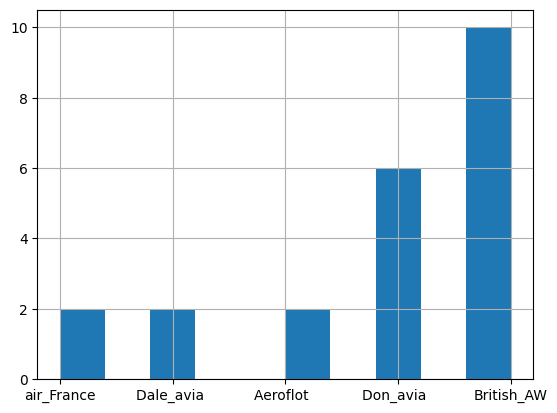

In [79]:
df_temp.name.hist()

6. Выгрузить данные из нескольких таблиц PostgreSQL в разные pandas DataFrame, выполнить объединение данных и сохранить результаты в новую таблицу PostgreSQL.

In [137]:
query_trip = 'SELECT * FROM public.trip'
query_company = 'SELECT * FROM public.company'
df_trip = pd.read_sql(query_trip, conn)
df_company = pd.read_sql(query_company, conn)

C:\Users\campus\AppData\Local\Temp\ipykernel_10500\2796291431.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trip = pd.read_sql(query_trip, conn)
C:\Users\campus\AppData\Local\Temp\ipykernel_10500\2796291431.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_company = pd.read_sql(query_company, conn)


In [142]:
df_merge = pd.merge(df_trip, df_company, on='id_comp')

7. Создать сводную таблицу на основе данных из таблицы PostgreSQL с помощью pandas и сохранить результаты в новую таблицу PostgreSQL.

In [145]:
pd.pivot_table(df_merge, index=['name', 'plane'], values='trip_no', aggfunc='count')

trip_no
name       plane              
Aeroflot   IL-86             2
British_AW Boeing           10
Dale_avia  TU-154            2
Don_avia   TU-134            4
           TU-154            2
air_France Boeing            2

8. Выполнить фильтрацию данных из таблицы PostgreSQL с помощью pandas и сохранить результаты в новую таблицу PostgreSQL.

In [151]:
df_merge['plane'] = df_merge.apply(lambda row: row['plane'].strip(), axis=1)

In [156]:
df_filtered = df_merge[df_merge['plane'] == 'Boeing'].reset_index(drop=True)

In [157]:
df_filtered

,trip_no,id_comp,plane,town_from,town_to,time_out,time_in,name
0,1100,4,Boeing,Rostov,Paris,1900-01-01 14:30:00,1900-01-01 17:50:00,air_France
1,1101,4,Boeing,Paris,Rostov,1900-01-01 08:12:00,1900-01-01 11:45:00,air_France
2,7771,5,Boeing,London,Singapore,1900-01-01 01:00:00,1900-01-01 11:00:00,British_AW
3,7772,5,Boeing,Singapore,London,1900-01-01 12:00:00,1900-01-01 02:00:00,British_AW
4,7773,5,Boeing,London,Singapore,1900-01-01 03:00:00,1900-01-01 13:00:00,British_AW
5,7774,5,Boeing,Singapore,London,1900-01-01 14:00:00,1900-01-01 06:00:00,British_AW
6,7775,5,Boeing,London,Singapore,1900-01-01 09:00:00,1900-01-01 20:00:00,British_AW
7,7776,5,Boeing,Singapore,London,1900-01-01 18:00:00,1900-01-01 08:00:00,British_AW
8,7777,5,Boeing,London,Singapore,1900-01-01 18:00:00,1900-01-01 06:00:00,British_AW
9,7778,5,Boeing,Singapore,London,1900-01-01 22:00:00,1900-01-01 12:00:00,British_AW


9. Преобразовать данные из таблицы PostgreSQL с помощью pandas и сохранить результаты в новую таблицу PostgreSQL.

In [159]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   trip_no    22 non-null     int64         
 1   id_comp    22 non-null     int64         
 2   plane      22 non-null     object        
 3   town_from  22 non-null     object        
 4   town_to    22 non-null     object        
 5   time_out   22 non-null     datetime64[ns]
 6   time_in    22 non-null     datetime64[ns]
 7   name       22 non-null     object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 1.5+ KB


In [160]:
df_merge.trip_no.astype(float)

0     1100.0
1     1101.0
2     1123.0
3     1124.0
4     1145.0
5     1146.0
6     1181.0
7     1182.0
8     1187.0
9     1188.0
10    1195.0
11    1196.0
12    7771.0
13    7772.0
14    7773.0
15    7774.0
16    7775.0
17    7776.0
18    7777.0
19    7778.0
20    8881.0
21    8882.0
Name: trip_no, dtype: float64

10. Выполнить операции с датами и временем на основе данных из таблицы PostgreSQL с помощью pandas и сохранить результаты в новую таблицу PostgreSQL.

In [162]:
df_merge['diff'] = df_merge.time_out - df_merge.time_in    

In [164]:
df_merge.to_sql('res', engine)

C:\Users\campus\AppData\Local\Temp\ipykernel_10500\51731777.py:1: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  df_merge.to_sql('res', engine)


22